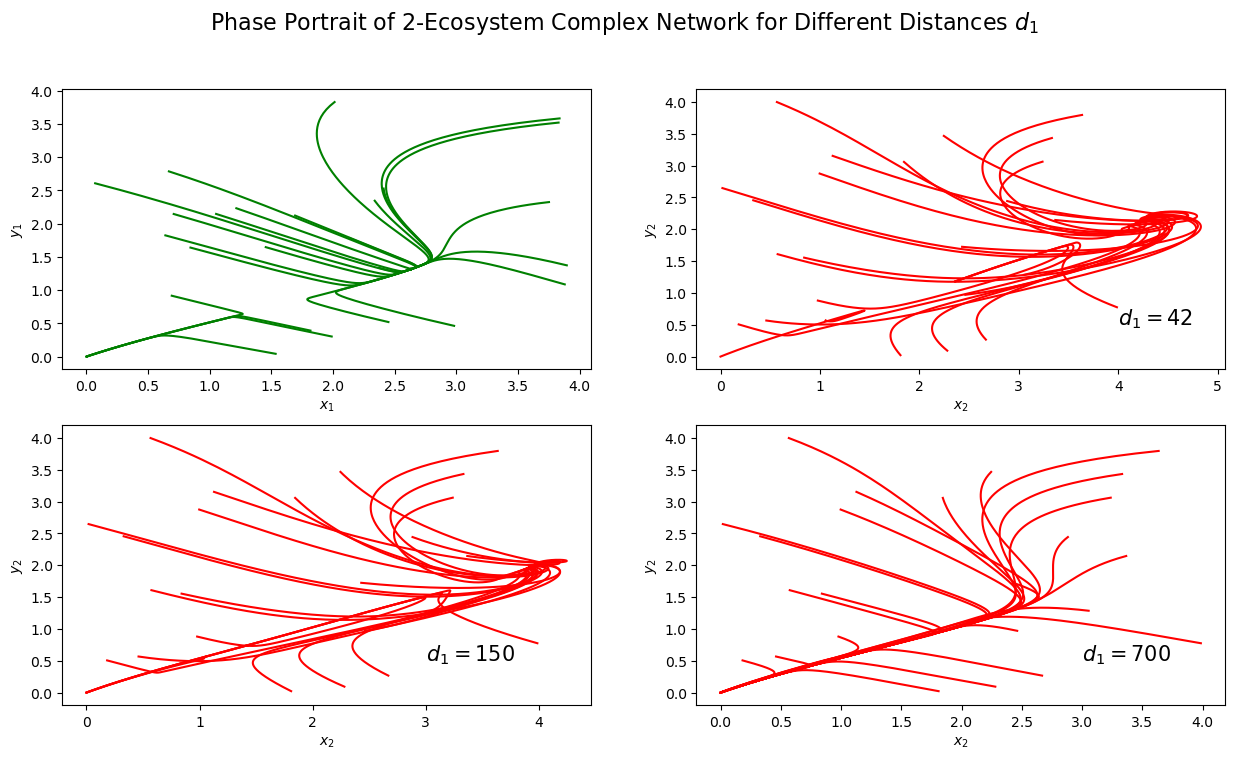

In [1]:
# Reproduce figure 7 from Cantin2020
using Distributions
using Random
using PyPlot
using DrWatson
using Suppressor
using DynamicalSystems
using CSSim

# Initialize plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
   
# Parameters for each distance
params_container = [
    Dict{Symbol,Any}(
        :ρ  => 4.2, 
        :f  => 1.0,
        :α₀ => -1.0, 
        :w₀ =>  1.0,
        :a₁ => 1.0, 
        :h  => 2.0, 
        :a₂ => 0.0, 
        :d  => [d1], 
        :l  => 600.0, 
        :P₀ => 1.0, 
        :β₁ => 0.0, 
        :β₂ => 1.0,
        :n  => 2,
        :ecosystems_to_deforest => [],
    )
    for d1 in [42, 150, 700]
]

# generate random uniform data
n_points = 25
u0s = 4*rand(MersenneTwister(42), n_points, 2, 2);

# Number of timesteps in years for solver
T = 50

# Maps for plotting
d_row_map = [1, 2, 2]
d_col_map = [2, 1, 2] # (d_ix % 2) + 1
d_xlim_map = [(0, 5), (0, 4), (0, 3)]

# Iterate over parameter dicts and plot
# ... suppress parameter dict performance warning
@suppress_err begin 
    for (d_ix, params) in enumerate(params_container)
        for point in 1:n_points
            u0 = u0s[point, :, :]
            two_forest_ds = n_forest_system(u0, params)   
            #two_forest_ds = n_forest_system(vec(u0), params) # test vector n_rule 
            #two_forest_ds = n_forest_system_oop(u0, params)  # test oop oop 
            #two_forest_ds = two_forest_system(u0, params)    # strict two system
            X, t = trajectory(two_forest_ds, T; Δt = 0.01)
            X_tensor = reshape(Matrix(X), :, params[:n], 2)

            # Could generalize this phase space code to n-forests
            if d_ix == 1
                x1 = X_tensor[:, 1, 1]
                y1 = X_tensor[:, 1, 2]
                axs[1, 1].plot(x1, y1, color="green")
                axs[1, 1].set_xlabel(L"$x_1$")
                axs[1, 1].set_ylabel(L"$y_1$")
            end

            x2 = X_tensor[:, 2, 1]
            y2 = X_tensor[:, 2, 2]

            axs[d_row_map[d_ix], d_col_map[d_ix]].plot(x2, y2, color="red")
            axs[d_row_map[d_ix], d_col_map[d_ix]].set_xlabel(L"$x_2$")
            axs[d_row_map[d_ix], d_col_map[d_ix]].set_ylabel(L"$y_2$")
        end 
    end
end 

# Add labels
kwargs = Dict(
    :fontweight => "extra bold",
    :fontsize => 15
)

axs[1, 2].text(4, 0.5, L"$d_1 = 42$"; kwargs...)
axs[2, 1].text(3, 0.5, L"$d_1 = 150$"; kwargs...)
axs[2, 2].text(3, 0.5, L"$d_1 = 700$"; kwargs...)
fig.suptitle(L"Phase Portrait of 2-Ecosystem Complex Network for Different Distances $d_1$", fontsize=16)
fig